# BARBERO IRIARTE, PILAR: EJERCICIOS ÁLGEBRA COMPUTACIONAL

# Ejercicio 1
Determina usando técnicas de bases de Groebner si los siguientes ideales son iguales:

- $ I : = < y^3 - z^2, xz - y^2, xy - z, x^2 -y > $

- $ J := < xy - z^2, xz - y^2, xy - z, x^2 - y > $

- $ K := < xz - y^2, x + y^2 -z - 1, xyz - 1 > $

- $ L := < y^2 - x^2y, z -xy, y - x^2 >$

Puedes ayudarte del ordenador.

**Respuesta:**

Por teoría, sabemos que dos ideales son iguales si y sólo si tienen la misma base de Groebner reducida. Calculemos la base asociada a cada ideal según el orden léxicográfico $y > x$,

**I.** Inicializamos la base $G'_I:=\{ i_1:= y^3 - z^2, i_2:=xz - y^2, i_3:=xy - z, i_4:=x^2-y \}$ y calculamos sus $S-$polinomios,

\begin{equation}
    \begin{array}{l}
    S(i_1, i_2) = xz^3 - y^5 \xrightarrow{z^2 i_2} y^5 + z^2y^2 \xrightarrow{y^2 i_1} 0\\
    S(i_1, i_3) = -x^2z^2 + y^4 \xrightarrow{-xz i_2} y^4 - xy^2z \xrightarrow{y i_1} yz^2 - xy^2z \xrightarrow{-y^2 i_2} yz^2 - y^4 \xrightarrow{-y i_1} 0\\
    S(i_1, i_4) = -x^2z^2 + y^4 \xrightarrow{-xz i_2} -xy^2z + y^4 \xrightarrow{-y^2 i_2} 0\\
    S(i_2, i_3) = -y^3 + z^2 \xrightarrow{-i_1} 0\\
    S(i_2, i_4) = -xy^2 + yz \xrightarrow{-y i_3} 0\\
    S(i_3, i_4) = -xz + y^2 \xrightarrow{-i_2} 0
    \end{array}
\end{equation}

**La base es $G_I = \{ i_1= y^3 - z^2, i_2=xz - y^2, i_3=xy - z, i_4=x^2-y \}$**

**II.** Lo mismo con $G_J':=\{ j_1:=xy-z^2, j_2:=i_2, j_3:=i_3, j_4:=i_4\}$

\begin{equation}
    \begin{array}{l}
        S(j_1, j_2) = y^3 - z^3 \\
        S(j_1, j_3) = -z^2 + z \\
        S(j_1, j_4) = -xz^2 + y^3 \xrightarrow{-z j_2} 0
    \end{array}
\end{equation}

Previamente ya hemos calculado,

\begin{equation}
    \begin{array}{l}
        S(j_2, j_3) = S(i_2, i_3) \rightarrow 0, \, \, \,
        S(j_2, j_4) = S(i_2, i_4) \rightarrow 0, \, \, \,
        S(j_3, j_4) = S(i_3, i_4) \rightarrow 0
    \end{array}
\end{equation}

Añadimos $j_5:=y^3 - z^3$ y $j_6:=-z^2 + z$ y calculamos los nuevos $S-$polinomios que nos surgen,

\begin{equation}
    \begin{array}{l}
        S(j_1, j_5) = xz^3 -y^2z^2 \xrightarrow{z^2 j_2} 0
        S(j_2, j_5) = xz^4 -y^5\xrightarrow{z^3 j_2} -y^5 + y^2z^3 \xrightarrow{-y_2 j_5} 0 \\
        S(j_3, j_5) = xz^3 - y^2z \xrightarrow{z^2 j_2} -y^2z + z^2y^2 \xrightarrow{-y^2 j_6} 0 \\
        S(j_4, j_5) = x^2z^3 - y^4 \xrightarrow{xz^2 j_2} xy^2z^2 - y^4 \xrightarrow{y^2 j_2} 0 \\
    \end{array}
\end{equation}

\begin{equation}
    \begin{array}{l}
        S(j_1, j_6) = - xyz + z^4 \xrightarrow{-z j_1} z^4 - z^3 \xrightarrow{-z^2 j_6} 0 \\
        S(j_2, j_6) = -xz + y^2z \xrightarrow{-j_2} zy^2 - y^2\\
        S(j_3, j_6) = -xyz + z^3 \xrightarrow{-z j_1} 0\\
        S(j_4, j_6) = -z^2z + yz \xrightarrow{-x j_2} -xy^2 + yz \xrightarrow{-y j_3} 0\\
        S(j_5, j_6) = -zy^3 +z^5 \xrightarrow{-z j_5} z^5 - z^4 \xrightarrow{-z^3 j_6} 0 
    \end{array}
\end{equation}

Añadimos $j_7:=zy^2 - y^2$  a la base y calculamos los $S-$polinomios que surgen,

\begin{equation}
    \begin{array}{l}
        S(j_1,j_7) = xy^2 -z^3 \xrightarrow{z j_1} 0 \\
        S(j_2,j_7) = xy^2 -y^4 \xrightarrow{y j_1} -y^4 + yz^2 \xrightarrow{-y i_5} yz^2 -yz^3 \xrightarrow{yz j_6} 0\\
        S(j_3,j_7) = xy^2 - yz \xrightarrow{y j_3} 0\\
        S(j_4,j_7) = x^2y^2 - y^3z \xrightarrow{xy j_3} xyz - y^3z \xrightarrow{z j_1} -y^3z+z^3 \xrightarrow{-z f_5}z^3 -z^3 \xrightarrow{z^2 j_6} 0\\
        S(j_5,j_7) = y^3 + z^4 \xrightarrow{f_5} -z^4 + z^3 \xrightarrow{zf_6} 0\\
        S(j_6,j_7) = y^2z - zy^2 = 0
    \end{array}
\end{equation}

La base queda $G_J':=\{ xy-z^2, xz - y^2, xy -z, x^2-y, y^3 -z^3, -z^2 + z, zy^2-y^2\}$, podemos eliminar el polinomio $xy -z^2$ ya que su $LT(xy-z^2) = xy$ es divisible por el $LT(xy-z)=xy$, quedando,

**$G_j=\{ xz - y^2, xy -z, x^2-y, y^3 -z^3, -z^2 + z, zy^2-y^2 \}$**

**III.** $G_K=\{k_1:=xz - y^2, k_2:=x + y^2 -z - 1, k_3:=xyz - 1\}$

\begin{equation}
    \begin{array}{l}
        S(k_1, k_2) = -y^2z -y^2 +z^2 + z\\
        S(k_1, k_3) = -y^3 + 1\\
    \end{array}
\end{equation}

Añadimos $k_4:=-y^2z - y^2 + z^2 +z$ y $k_5:=-y^3 + 1$ a la base y continuamos.

\begin{equation}
    \begin{array}{l}
        S(k_2, k_3) = y^3z - yz^2 -yz + 1 \xrightarrow{-zk_5} -yz^2 -yz + 1 + z
    \end{array}
\end{equation}

Añadimos $k_6:=-yz^2 - yz + 1 + z$ a la base y continuamos,

\begin{equation}
    \begin{array}{l}
        S(k_1, k_4) = y^4 +xy^2 -xz^2-xz \xrightarrow{y^2 k_2} -xz^2 -xz + y^2z +y^2 \xrightarrow{-zk_1} -xz +y^2 \xrightarrow{-k_1} 0 \\        
        S(k_1, k_5) = -xz +y^5 \xrightarrow{-k_1} y^5 - y^2 \xrightarrow{-y^2k_5} 0\\        
        S(k_1, k_6) = xyz - xz - x + y^3z \xrightarrow{k_3} -xz - x + y^3z + 1 \xrightarrow{-k_1} -x + y^3z + 1 -y^2 \xrightarrow{-k_2} y^3z - z \xrightarrow{-z k_5} 0 \\        
        S(k_2, k_4) = xy^2 -xz^2 -xz -y^4z + y^2z^2 +y^2z \xrightarrow{y^2 k_2} -xz^2 -xz -y^4z +y^2z^2 + 2y^2z -y^4+y^2 \xrightarrow{-z k_1} -xz - y^4z + y^2z^2 + y^2z - y^4+y^2 \xrightarrow{-k_1} -y^4z + y^2z^2 +y^2z - y^4 \xrightarrow{y^2 k_4} 0 \\        
        S(k_2, k_5) = -x -y^5 + y^3z +y^3 \xrightarrow{-k_2} -y^5+y^3z+y^3+y^2-z-1 \xrightarrow{y^2 k_5} y^3z +y^3 -z -1 \xrightarrow{-zk_5} y^3 -z \xrightarrow{-k_5} 0 \\        
        S(k_2, k_6) = xyz -xz - x -y^3z^2+yz^3+yz^2 \xrightarrow{k_3} -y^3z^2 + yz^3+yz^2-xz-x+1\xrightarrow{-k_1} -y^3z^2+yz^3+yz^2-x+1-y^2\xrightarrow{-k_2} -y^3z^2+yz^3+yz^2-z\xrightarrow{z^2k_5} yz^3+yz^2-z-z^2\xrightarrow{-zk6} 0\\
        S(k_3, k_4) = xy^2 -xz^2 - xz +y \xrightarrow{y^2 k_2} -xz^2 - xz + y -y^4+y^2z + y^2 \xrightarrow{-z k_1} -xz+y+y^4+y^2 \xrightarrow{-k_1} y-y^4 \xrightarrow{y k_5} 0 \\        
        S(k_3, k_5) = -xz +y^2 \xrightarrow{-k_1} 0 \\        
        S(k_3, k_6) = xyz -xz-x+z \xrightarrow{k_3} -xz-x+z+1 \xrightarrow{-k_1} -x+z+1-y^2 \xrightarrow{-k_2} 0\\        
        S(k_4, k_5) = -y^3+yz^2+yz-z \xrightarrow{k_5} yz^2+yz-z-1 \xrightarrow{-k_6} 0 \\        
        S(k_4, k_6) = -yz-y+z^3+z^2 \\        
        S(k_5, k_6) = -y^2+z^2        
    \end{array}
\end{equation}

Como se puede comprobar, deberíamos añadir los $S-$polinomios, $S(k_4,k_6)$ y $S(k_5, k_6)$ a la base y esa base no sería igual a ninguna de las bases de los demás ideales.

**IV. $G_L=\{ l_1:=y^2 - x^2y, l_2:=z -xy, l_3:=y - x^2 \}$**

\begin{equation}
    \begin{array}{l}
        S(l_1, l_2) = -y^2-z\xrightarrow{-yl_3} -x^2y-z\xrightarrow{xl_2} -xz - z \\
        S(l_1, l_3) = 0\\+
        S(l_2, l_3) = xz -y^2
    \end{array}
\end{equation}

Añadimos $l_4:=-xz - z$ y $l_5:=xz-y^2$ a la base $G_L$,

\begin{equation}
    \begin{array}{l}
        S(l_1, l_4) = \\
        S(l_2, l_4) = \\
        S(l_3, l_4) = \\
        S(l_1, l_5) = \\
        S(l_2, l_5) = \\
        S(l_3, l_5) = \\
        S(l_4, l_5) = \\
    \end{array}
\end{equation}

Vamos a utilizar el paquete _sympy_ que nos proporcina un conjunto de órdenes útiles a la hora de calcular bases de Groeber.

In [7]:
from sympy import groebner
import sympy as sp
from sympy.abc import x,y,z

In [8]:
i1 = y**3  - z**2
i2 = x*z - y**2
i3 = x*y - z
i4 = x**2 - y

In [9]:
j1 = x*y - z**2
j2 = x*z - y**2
j3 = x*y - z
j4 = x**2 - y

In [10]:
k1 = x*z -y**2 
k2 = x+y**2 - z - 1
k3 = x*y*z - 1

In [11]:
l1 = y**2 - (x**2)*y
l2 = z- x*y
l3 = y - x**2

In [12]:
GI = sp.groebner([i1, i2, i3, i4], x, y, z, order='lex', method='buchberger')
GJ = sp.groebner([j1, j2, j3, j4], x, y, z, order='lex', method='buchberger')
GK = sp.groebner([k1, k2, k3], x, y, z, order='lex', method='buchberger')
GL = sp.groebner([l1, l2, l3], x, y, z, order='lex', method='buchberger')

In [13]:
print GI
print GJ
print GK
print GL

GroebnerBasis([x**2 - y, x*y - z, x*z - y**2, y**3 - z**2], x, y, z, domain='ZZ', order='lex')
GroebnerBasis([x**2 - y, x*y - z, x*z - y**2, y**3 - z, y**2*z - y**2, z**2 - z], x, y, z, domain='ZZ', order='lex')
GroebnerBasis([x + y**2 - z - 1, y**3 - 1, y*z + y - z**3 - z**2, z**4 + z**3 - z - 1], x, y, z, domain='ZZ', order='lex')
GroebnerBasis([x**2 - y, x*y - z, x*z - y**2, y**3 - z**2], x, y, z, domain='ZZ', order='lex')


In [14]:
GI == GL

True

Podemos comprobar que el ideal $I$ y el ideal $L$ poseen la misma base de Groebner reducida, por lo que son iguales.

***

# Ejercicio 2
Calcula, sin usar el ordenador, mediante el algoritmo de Buchberger una base reducida del ideal $I = < xy + z, x^2 + y^2 >$.

**Respuesta:**

Defininimos $f_1 := xy + z$ y $f_2 := x^2 + y^2$.

Vamos a aplicar el algoritmo de Buchberger a partir de $\{f_1, f_2\}$. Fijamos el orden lex con $x > y > z$. Comenzamos con la base de Groebner $G':=\{f_1, f_2\}$ y comprobaremos si los $S-$polinomios son reducibles hasta 0. 

\begin{equation} 
S(f_1, f_2) = x(xy + z) - y(x^2+y^2) = xz - y^3
\end{equation}

Este polinomio ya no es reducible por $G'$, así que lo añadimos a la base $G':=\{f_1, f_2, f_3:=xz - y^3\}$

Ahora $S(f_1, f_2)$ sí que es reducible a 0, ya que hemos añadido $xz - y^3$ a la base, pero quedan otros $S-$polinomios que comprobar,

\begin{equation} 
S(f_1, xz - y^3) = z(xy + z) - y (xz - y^3) = y^4 + z^2
\end{equation}

Este polinomio no puede ser reducible por ninguno de los demás polinomios de la base ($LT(y^4 + z^2) = y^4$ no es divisibile por ningún $LT$ de la base $G'$), así que lo añadimos.

\begin{equation} 
S(f_2, xz - y^3) = z(x^2 + y^2) - x(xz - y^3) = zy^2 + xy^3 = y^2(xy + z) \xrightarrow{y^2f_1} 0
\end{equation} 

Estamos en la situación de que $G'=\{xy + z, x^2 + y^2, f_3:=xz - y^3, f_4:=y^4 + z^2\}$ podría ser nuestra base de Groebner, pero al haber añadido el polinomio $f_4:=y^4 + z^2$, debemos comprobar los demás $S-$polinomios que nos surgen al hacer esta adición.  

\begin{equation}
    \begin{array}{l}
        S(f_1, f_4) = y^3(xy+z) - x(y^4+z^2) = -xz^2 + y^3z \xrightarrow{zf_3} 0  \\
        S(f_2, f_4) = y^4(x^2+y^2) - x^2(y^4+z^2) = -x^2z^2 + y^6 \xrightarrow{-xz f_3} -xy^3z+y^6 \xrightarrow{-y^2zf_1} y^6+y^2z^2 \xrightarrow{y^2f_4} 0\\
        S(f_3, f_4) = y^4(xz-y^3) - xz(y^4+z^2) = -xz^3-y^7 \xrightarrow{-z^2 f_3} -y^7 - z^2y^3 \xrightarrow{-y^3f_4} 0
    \end{array}
\end{equation} 

Podemos concluir que $G:=\{f_1:=xy + z, f_2:=x^2 + y^2, f_3:=xz - y^3, f_4:=y^4 + z^2\}$ es una base de Groebner.

Es reducida, ya que $\forall g\in G$, $LC(g) = 1$ y además, $LT(g)$ no es dividido por ningún otro $LT(g')$ con $g' \in G \setminus \{g\}$

Podemos comprobarlo gracias a la función _groebner_ que nos proporciona el paquete de funciones _Sympy_.

In [15]:
f1=x*y + z
f2=x**2 + y**2
G=sp.groebner([f1,f2], x, y, z, order='lex', method='buchberger')
G

GroebnerBasis([x**2 + y**2, x*y + z, x*z - y**3, y**4 + z**2], x, y, z, domain='ZZ', order='lex')

***

 Determina también sin usar el ordenador si la clase $[x + 1]$ es invertible en $k[x,y,z]/I$

**Respuesta:**

Observemos que si $[x+1]$ es invertible entonces $(x+1)f + (xy+z)g + (x^2 + y^2)h = 1$, así que vamos a calcular el ideal de $ < x+1, xy +z, x^2+y^2 > $

Definimos $f_1:= x+1, f_2:=xy + z, f_3:=x^2+y^2$, y calculamos su correspondiente base de Groebner. Volvemos a aplicar el algoritmo de Buchberger a esta base $G':=\{f_1, f_2, f_3\}$. Empezamos a calcular los $S-$polinomios, 

 \begin{equation}
    S(f_1, f_2) = y - z 
\end{equation}

Como $LT(y - z)$ no es divisible por ningún $LT(g)$ para $g$ polinomio en nuestra base, añadimos $f_4:=y-z$ a la base de Groebner, quedándonos así $G'= \{f_1, f_2, f_3, f_4:=y-z\}$. 

Como hemos añadido $f_4$ a la nueva base, debemos comprobar los nuevos $S-$polinomios que genera.

\begin{equation}
    \begin{array}{l}
        S(f_1, f_4) = xz + y \xrightarrow{z f_1} y - z \xrightarrow{f_4} 0\\    
        S(f_2, f_4) = xz + z \xrightarrow{z f_1} 0 \\
        S(f_3, f_4) = x^2z + y^3 \xrightarrow{z f_3} y^3 - y^2z \xrightarrow{y^2 f_4} 0 
    \end{array}
\end{equation}

Continuamos el proceso con los $S-$polinomios anteriores,

\begin{equation}
    \begin{array}{l}
        S(f_1, f_3) = x - y^2 \xrightarrow{f_1} -y^2 - 1 \xrightarrow{-y f_4} -yz - 1 \xrightarrow{-z f_4} -z^2-1 
    \end{array}
\end{equation}

Como $LT(z^2) - 1$ no es divisible por ningún $LT(g)$ para $g$ polinomio en nuestra base, añadimos $f_5:=-z^2 - 1$ a la base $G':=\{f_1, f_2, f_3, f_4, f_5:=-z^2 - 1\}$. Al añadirlo, debemos comprobar los $S-$polinomios que se nos generan,

\begin{equation}
    \begin{array}{l}
        S(f_1, f_5) = x-z^2 \xrightarrow{f_1} -z^2 - 1 \xrightarrow{f_ 5} 0 \\
        S(f_2, f_5) =  xy-z^3 \xrightarrow{f_2} -z^3 - z \xrightarrow{z f_5} 0 \\
        S(f_3, f_5) = x^2-y^2z^2 \xrightarrow{f_3} y^2(-z^2 - 1) \xrightarrow{f_5} 0\\
        S(f_4, f_5) = y + z^3 \xrightarrow{f_4} z^3 + z \xrightarrow{f_5} 0
    \end{array}
\end{equation}

Continuamos el proceso con la demás combinaciones que nos quedan con la base $G'=\{f_1, f_2, f_3, f_4, f_5\}$

\begin{equation}
    S(f_2, f_3) = S(xy+z, x^2+y^2) = \dots = xz - y^3 \xrightarrow{zf_1} -y^3 - z \xrightarrow{-y^2 f_4} -y^2z - z \xrightarrow{-yz f_4} -z^2y - z \xrightarrow{-z^2 f_4} -z^3 - z \xrightarrow{z f_5} 0
\end{equation}

La base de Groebner del ideal $< x+1, xy+z, x^2+y^2 >$ es,

$$G=\{f_1=x+1, f_2=xy+z, f_3=x^2+y^2, f_4=y-z, f_5=-z^2-1\}$$

Comprobamos las dos condiciones para que sea reducida,

- $\forall g\in G, LC(g) = 1$ así que cambiamos el signo a $f_5$.
- $LT(f_1)=LT(x+1) = x$ divide a $LT(f_2) = LT(xy+z) = xy$ y a $LT(f_3) = LT(x^2+y^2) = x^2$, por lo que es posible expulsar a $f_2$ y $f_3$ de la base, y conseguimos la base reducida.

$$ G=\{f_1=x+1, f_4=y-z, f_5=z^2+1\}$$

In [16]:
f1=x+1
f2=x*y + z
f3=x**2 + y**2
G=sp.groebner([f1,f2,f3], x, y, z, order='lex', method='buchberger')
G

GroebnerBasis([x + 1, y - z, z**2 + 1], x, y, z, domain='ZZ', order='lex')

***

# Ejercicio 3
Calcula el abanico de Groebner del ideal $< x^2 − y^3 , x^3 − y^2 + x >$.


**Respuesta:**

Calculamos primero las bases de groebner asociadas a este ideal, para cada orden distinto.

In [44]:
g1 = x**2 - y**3 
g2 = x**3 - y**2 + x
G1 = sp.groebner([g1,g2], x, y, order='lex', method='buchberger') # Orden lex x > y
G2 = sp.groebner([g1,g2], y, x, order='lex', method='buchberger') # Orden lex y > x
G3 = sp.groebner([g1,g2], x, y, order='grevlex', method='buchberger') # Orden grevlex x > y
G4 = sp.groebner([g1,g2], y, x, order='grevlex', method='buchberger') # Orden grevlex y > x
G5 = sp.groebner([g1,g2], x, y, order='grlex', method='buchberger') # Orden grlex x > y
G6 = sp.groebner([g1,g2], y, x, order='grlex', method='buchberger') # Orden grlex y > x

for i in [G1,G2,G3,G4,G5,G6]:
    print i

GroebnerBasis([x + y**7 + y**4 - y**2, y**9 + 2*y**6 - y**4 + y**3], x, y, domain='ZZ', order='lex')
GroebnerBasis([-x**3 - x + y**2, x**7 + 2*x**5 + x**3 - x**2 + x*y, x**8 + 3*x**6 + 3*x**4 - x**3 + x**2], y, x, domain='ZZ', order='lex')
GroebnerBasis([x**3 - y**2 + x, y**3 - x**2], x, y, domain='ZZ', order='grevlex')
GroebnerBasis([y**3 - x**2, x**3 - y**2 + x], y, x, domain='ZZ', order='grevlex')
GroebnerBasis([x**3 - y**2 + x, y**3 - x**2], x, y, domain='ZZ', order='grlex')
GroebnerBasis([y**3 - x**2, x**3 - y**2 + x], y, x, domain='ZZ', order='grlex')


Calculemos sus correspondientes conos:

- $C_{G_1} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | a\geq 7b \}$
- $C_{G_2} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | b\geq 6a \} $ 
- $C_{G_3} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3a\geq 2b, 3b\geq 2a\} $
- $C_{G_4} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3b\geq 2a, 3a\geq 2b \} $
- $C_{G_5} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3a\geq 2b, 3b\geq 2a\} $
- $C_{G_6} = \{(a,b)\in \mathbb{R}_{\geq 0}^2 | 3b\geq 2a, 3a\geq 2b \} $

A simple vista podemos observar que los conos $C_{G_4}, C_{G_5}, C_{G_6}$ son iguales al cono $C_{G_3}$,

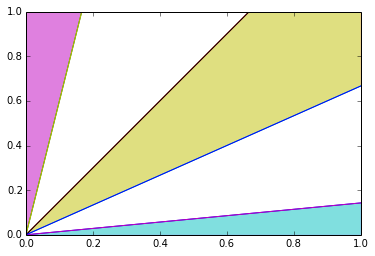

In [82]:
from fillplots import plot_regions
plotter = plot_regions([
    [(lambda x: x/7, True),  ], #CG_1
    [(lambda x: 6*x, False), ], #CG_2
    [(lambda x: 3*x/2, True), (lambda x: 2*x/3, False)],
],xlim=(0, 1), ylim=(0, 1))

plotter.plot()

Nos quedan dos zonas sin cubrir, así que tomaremos vectores en ella y obtendremos los órdenes asociados a éstas,

Tomaremos los vectores $\omega_0 = (4,1)$ y $\omega_1 = (1,4)$, y obtenemos las matrices $M_{w_0}=\begin{pmatrix} 4 & 1 \\ 1 & 1 \end{pmatrix}$ y $M_{w_0}=\begin{pmatrix} 1 & 4 \\ 1 & 1 \end{pmatrix}$. Los conos asociados a estos órdenes son,

- $C_{G_7} = \{ (a,b)\in \mathbb{R}_{\geq 0}^2 | a\leq 7b, 3b\leq 2a \}$
- $C_{G_8} = \{ (a,b)\in \mathbb{R}_{\geq 0}^2 | b\leq 6a, 3a\leq 2b \}$

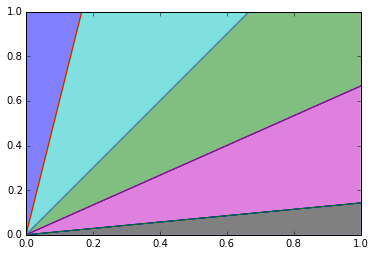

In [83]:
plotter1 = plot_regions([
    [(lambda x: x/7, True),  ], 
    [(lambda x: 6*x, False), ], 
    [(lambda x: 3*x/2, True), (lambda x: 2*x/3, False)], 
    [(lambda x: 3*x/2, False), (lambda x: 6*x, True)], 
    [(lambda x: 2*x/3, True), (lambda x: x/7, False)], 
],xlim=(0, 1), ylim=(0, 1))

plotter.plot()

***

## Ejercicio 4
¿Puede escribirse $4x^4y^2 + 4y^6 - 2x^4 - 4x^2y^2 - 6y^4 + 2x^2 + 4y^2 -1$ de la forma $h(x^2 + y^2 + 1, x^2 - y^2)$ para algún polinomio $h\in \mathbb{Q}[x,y]$?

**Respuesta:**

Podemos calcular la base de Groebner asociada al ideal $< x^2 + y^2 + 1, x^2-y^2 >$ y veremos si el polinomio $4x^4y^2 + 4y^6 - 2x^4 -4x^2y^2 - 6y^4 + 2x^2 + 4y^2 - 1$ es reducible por esta base.

$f_1:=x^2+y^2+1$, $f_2:=x^2-y^2$, inicializamos $G':=\{f_1, f_2\}$

\begin{equation}
    S(f_1,f_2) = \frac{x^2}{x^2} (x^2+y^2+1) - \frac{x^2}{x^2} (x^2-y^2) = 2y^2+1
\end{equation}

Añadimos a nuestra base $f_3:=2y^2 + 1$ ya que su $LT(f_3) = 2y^2$ no es divisible por ningún otro $LT(g)$ para $g\in G'$.

Seguimos calculando $S-$polinomios de la nueva base $G'':=\{f_1, f_2, f_3\}$

\begin{equation}
    \begin{array}{l}
        S(f_1, f_3) = \frac{2x^2y^2}{x^2} (x^2+y^2+1) - \frac{2x^2y^2}{2y^2} (2y^2+1) = -x^2 + 2y^4 + 2y^2 \xrightarrow{f_2} 2y^4 + y^2 \xrightarrow{y^2 f_3} 0 \\
        S(f_2, f_3) = \frac{2x^2y^2}{x^2} (x^2-y^2) - \frac{2x^2y^2}{2y^2} (2y^2+1) = -x^2-2y^4 \xrightarrow{- f_2} -2y^4 - y^2 \xrightarrow{-y^2 f_3} 0
    \end{array}
\end{equation}

La base nos queda $G'':=\{x^2+y^2+1, x^2-y^2, 2y^2+1\}$. La podemos reducir ya que $LT(f_1)$ divide a $LT(f_2)$, sumamos los dos polinomios, $f_1 + f_2 = x^2 + y^2 +1 + x^2 - y^2 = 2x^2 + 1$.

Así $G:=\{2x^2 + 1, 2y^2 + 1\}$.

Comprobamos utilizando _sympy_:

In [1]:
from sympy import groebner
import sympy as sp
from sympy.abc import x,y,z

a1=x**2+y**2+1
a2=x**2 - y**2
f=4*(x**4)*(y**2)  + 4*y**6 - 2*x**4 - 4*(x**2)*(y**2) - 6*(y**4) + 2*x**2 + 4*y**2 - 1
G = sp.groebner([a1,a2])
G

GroebnerBasis([2*x**2 + 1, 2*y**2 + 1], x, y, domain='ZZ', order='lex')

Procedemos a reducir el polinomio a través de los polinomios de la base de Groebner, $f_1:=2x^2 + 1$, $f_2:=2y^2+1$,

\begin{equation}
    \begin{array}{l l}
        4x^4y^2 + 4y^6 - 2x^4 -4x^2y^2 - 6y^4 + 2x^2 + 4y^2 - 1 \xrightarrow{2x^2y^2 f_1} 4y^6 - 2x^4 -6x^2y^2 - 6y^4 + 2x^2 + 4y^2 - 1 \xrightarrow{2y^4 f_2} -2x^4 - 6x^2y^2 - 8y^4 + 2x^2 + 4y^2-1 \xrightarrow{-x^2 f_1} -6x^2y^2 - 8y^4 + 3x^2 + 4y^2 - 1 \xrightarrow{-3 f_1} -8y^4 + 3x^2 + 7y^2 - 1 \xrightarrow{-4y^2 f_2} 3x^2 + 11y^2 - 1 \xrightarrow{3/2 f_1} 11y^2 - \frac{5}{2} \xrightarrow{11/2 f_2} -8 
    \end{array}
\end{equation}


O, utilizando la orden de _sympy_ de _reduce_ obtenemos el mismo resto:

In [2]:
G.reduce(f)

([2*x**2*y**2 - x**2 - 3*y**2 + 3/2, 2*y**4 - 4*y**2 + 11/2], -8)

Por lo que concluimos que no es reducible, así que **no** existe un $h\in \mathbb{Q}[x,y]$ que cumpla nuestra condición.

***